<a href="https://colab.research.google.com/github/AbdulWahabRaza123/ML/blob/main/HandWrittenDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#importing dataset from tensorflow keras
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#lets check the length of train dataset
len(X_train),len(y_train)

(60000, 60000)

In [5]:
#checking length of test dataset
len(X_test),len(y_test)

(10000, 10000)

In [6]:
#checking the shape of the image
X_train[0].shape

(28, 28)

In [7]:
#0th index image has these pixels
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

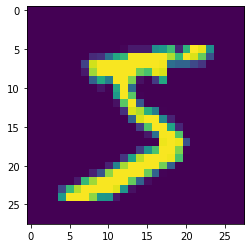

In [8]:
#as you can see values are between 0 and 255
#let's show the image
plt.imshow(X_train[0]) #this is showing number 5

In [9]:
#let's check the actual number
y_train[0]

5

In [10]:
#as you can see actual number is 5 as the picture
#our first 5 numbers are 
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

###Let's work on data

We are going to flattern the dataset to feed it to the model so that model can predict the number. To flattern our image we can use the pandas function reshape.

**Note:** If you want good prediction then you can normalize the pixels value into 0 and 1

In [11]:
#let's reshape the images
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
28*28

784

In [14]:
#Now let's change the (60000,28,28) into (60000,784)
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [15]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [16]:
#As you can see we successfully changed the shape
X_train_flattened[0]
#Now we succesfully changed the 2-d array into 1-d array

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

###Let's Create the model

In [28]:
#setting random seed
tf.random.set_seed(42)
#creating model
model_1=keras.Sequential(
    [
        keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
    ]
)
#compiling model
model_1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
#fitting model
model_1.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.6509 - accuracy: 0.8396
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1122 - accuracy: 0.8776
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7375 - accuracy: 0.8822
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5156 - accuracy: 0.8869
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4937 - accuracy: 0.8877


###Now we will scale the values for better results between 0 to 1

In [51]:
X_train_norm=X_train/255
X_test_norm=X_test/255
X_train_norm,X_test_norm

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [49]:
X_train_flattened_norm=X_train_norm.reshape(len(X_train),28*28)
X_train_flattened_norm.shape

(60000, 784)

In [52]:
X_test_flattened_norm=X_test_norm.reshape(len(X_test),28*28)
X_test_flattened_norm.shape

(10000, 784)

In [54]:
#Now creating model again
tf.random.set_seed(42)
#Now creating model
model_2=keras.Sequential(
    [
        keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
    ]
)
#compiling model
model_2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
#fitting model
history_2=model_2.fit(X_train_flattened_norm,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4655 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9251


In [55]:
model_2.evaluate(X_test_flattened_norm,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2678 - accuracy: 0.9251


[0.2678346335887909, 0.9251000285148621]

In [62]:
y_pred=model_2.predict(X_test_flattened_norm)
y_pred[0]


array([1.7834544e-02, 2.7746702e-07, 7.0214421e-02, 9.5070636e-01,
       1.9637942e-03, 1.3680711e-01, 1.4934951e-06, 9.9980122e-01,
       9.8783433e-02, 6.1829221e-01], dtype=float32)

In [64]:
#to get the maximum value of 10 output neuron so the predicted result is
np.argmax(y_pred[0])

7

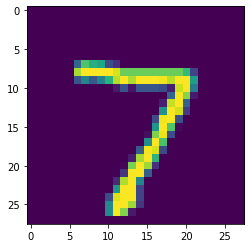

In [65]:
#Actual Result is
plt.imshow(X_test[0])

###Plotting confusion matrix

In [66]:
#creating y predicted
y_predicted=model_2.predict(X_test_flattened_norm)
y_predicted[1]

array([4.3081880e-01, 3.6793053e-03, 9.9960423e-01, 3.9692831e-01,
       6.7857714e-10, 8.6048412e-01, 8.7834716e-01, 1.1317440e-12,
       1.6751802e-01, 3.5327228e-09], dtype=float32)

In [67]:
np.argmax(y_predicted[1])

2

In [68]:
#For confusion matrix we are going to predict y for all the values
y_pred_labels=[np.argmax(i) for i in y_predicted]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [69]:
#lets make confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    7,    5,    3,    3,    1],
       [   0, 1107,    4,    2,    0,    1,    4,    2,   15,    0],
       [   3,    7,  938,   14,    6,    2,   11,    9,   38,    4],
       [   2,    0,   27,  912,    0,   25,    2,   12,   23,    7],
       [   1,    1,   10,    1,  900,    0,   10,    4,   11,   44],
       [   7,    2,    8,   30,    8,  784,    9,    6,   31,    7],
       [   8,    3,    9,    1,    8,   18,  905,    2,    4,    0],
       [   1,    5,   28,    4,    6,    0,    0,  949,    3,   32],
       [   4,    5,    7,   18,    9,   24,    8,   12,  881,    6],
       [   9,    7,    2,   10,   23,    7,    0,   26,    7,  918]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

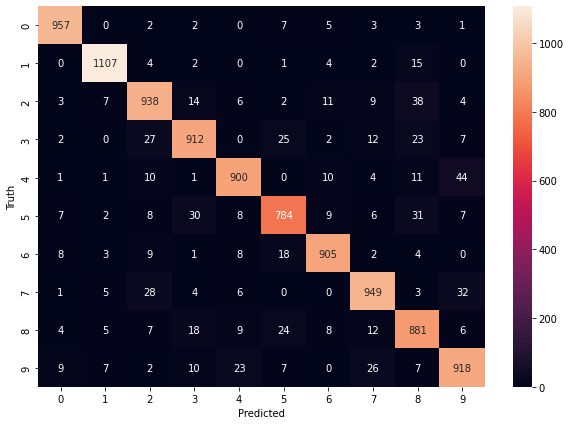

In [70]:
#Now let's see confusion matrix in visualizing way
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

###Let's add an hidden layer in the model

In [73]:
#Now creating model again
tf.random.set_seed(42)
#Now creating model
model_3=keras.Sequential(
    [
        keras.layers.Dense(100,input_shape=(784,),activation="relu"),
        keras.layers.Dense(10,activation="sigmoid")
    ]
)
#compiling model
model_3.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
#fitting model
history_3=model_3.fit(X_train_flattened_norm,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2717 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1205 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0843 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0640 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9845


In [75]:
#let's evaluate the model
model_3.evaluate(X_test_flattened_norm,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0930 - accuracy: 0.9716


[0.09299484640359879, 0.9715999960899353]

In [77]:
#to plot confusion matrix
y_predicted_2=model_3.predict(X_test_flattened_norm)
y_predicted_2[1]

array([2.5106907e-01, 4.2421949e-01, 9.9999976e-01, 7.8101879e-01,
       2.8621227e-07, 7.7134997e-02, 1.3356486e-01, 3.0018225e-07,
       4.0001649e-01, 2.5024601e-06], dtype=float32)

In [78]:
#For confusion matrix we are going to predict y for all the values
y_pred_labels_2=[np.argmax(i) for i in y_predicted_2]
y_pred_labels_2[:5]

[7, 2, 1, 0, 4]

In [79]:
#lets make confusion matrix
cm_2=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels_2)
cm_2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    4,    0,    1,    6,    5,    1,    2,    3],
       [   0, 1104,    5,    0,    0,    0,    4,    1,   21,    0],
       [   0,    0, 1020,    0,    1,    0,    1,    4,    6,    0],
       [   0,    0,   21,  969,    0,    8,    0,    2,    8,    2],
       [   1,    0,    4,    1,  951,    2,    4,    3,    2,   14],
       [   2,    0,    0,    4,    1,  879,    1,    0,    2,    3],
       [   5,    2,    3,    0,    7,   11,  929,    0,    1,    0],
       [   1,    1,   24,    5,    1,    0,    0,  985,    2,    9],
       [   4,    0,    7,    4,    3,    4,    5,    2,  943,    2],
       [   2,    3,    1,    5,    5,    6,    1,    2,    6,  978]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

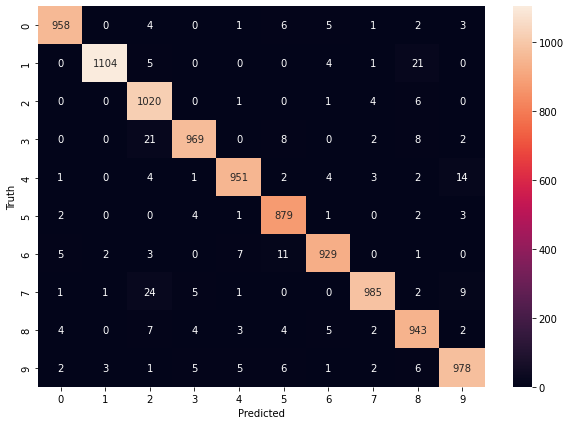

In [80]:
#Now let's see confusion matrix in visualizing way
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_2,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")